# 第7天 - 线性代数进阶

## 🎯 今日目标
- 理解特征值和特征向量的概念
- 掌握PCA降维的基本原理
- 学会用NumPy实现线性代数算法
- 理解在机器学习中的应用

## 📚 学习内容
1. 特征值与特征向量
2. 主成分分析(PCA)
3. 奇异值分解(SVD)
4. 实际应用案例


In [16]:
import numpy as np
import matplotlib.pyplot as plt
import platform

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 设置图表样式
plt.style.use('default')  # 使用默认样式，简洁清晰

# 根据系统自动选择字体
if platform.system() == 'Darwin':  # macOS
    plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'Hiragino Sans GB']
elif platform.system() == 'Windows':
    plt.rcParams['font.sans-serif'] = ['SimHei', 'Microsoft YaHei']
else:  # Linux
    plt.rcParams['font.sans-serif'] = ['WenQuanYi Micro Hei', 'SimHei']

plt.rcParams['axes.unicode_minus'] = False

print("📊 第7天：线性代数进阶")

📊 第7天：线性代数进阶


## 1. 特征值与特征向量

### 🤔 什么是特征值和特征向量？

**简单理解**：
- 特征向量 = 矩阵变换后方向不变的向量
- 特征值 = 特征向量被拉伸的倍数

**数学表达**：对于矩阵 A，如果 Av = λv，那么：
- v 是特征向量 (eigenvector)
- λ 是特征值 (eigenvalue)


In [17]:
# 创建一个简单的2x2矩阵
A = np.array([[3, 1],
              [1, 3]])

print("矩阵 A:")
print(A)

# 计算特征值和特征向量
eigenvalues, eigenvectors = np.linalg.eig(A)

print("\n特征值 (eigenvalues):", eigenvalues)
print("\n特征向量 (eigenvectors):")
print(eigenvectors)


矩阵 A:
[[3 1]
 [1 3]]

特征值 (eigenvalues): [4. 2.]

特征向量 (eigenvectors):
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


In [9]:
# 验证 Av = λv
v1 = eigenvectors[:, 0]  # 第一个特征向量
λ1 = eigenvalues[0]      # 第一个特征值

print("特征向量 v1:", v1)
print("特征值 λ1:", λ1)
print("\n验证 Av = λv:")
print("Av =", A @ v1)
print("λv =", λ1 * v1)
print("\n差异 (应该接近0):", np.abs(A @ v1 - λ1 * v1))


特征向量 v1: [0.70710678 0.70710678]
特征值 λ1: 4.0

验证 Av = λv:
Av = [2.82842712 2.82842712]
λv = [2.82842712 2.82842712]

差异 (应该接近0): [0. 0.]


### 📊 特征向量的几何意义

让我们可视化特征向量在矩阵变换前后的变化：


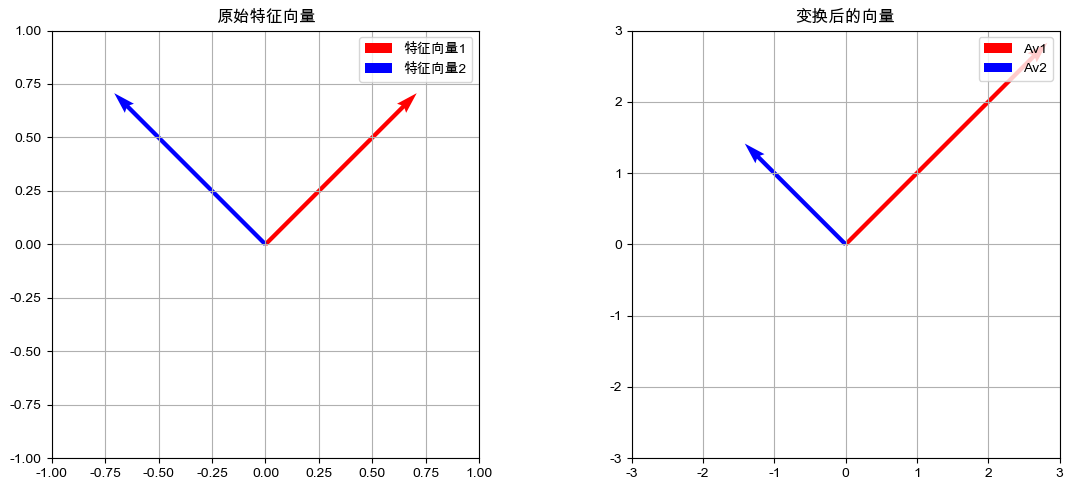

Eigenvector 1 scaled by: 4.00x
Eigenvector 2 scaled by: 2.00x


In [19]:
# 可视化特征向量
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# 原始向量
v1 = eigenvectors[:, 0]
v2 = eigenvectors[:, 1]

# 变换后的向量
Av1 = A @ v1
Av2 = A @ v2

# 中文标签
labels = ['特征向量1', '特征向量2']
titles = ['原始特征向量', '变换后的向量']
feature_text = ['特征1', '特征2']

# 绘制原始特征向量
ax1.quiver(0, 0, v1[0], v1[1], angles='xy', scale_units='xy', scale=1, 
          color='red', width=0.01, label=labels[0])
ax1.quiver(0, 0, v2[0], v2[1], angles='xy', scale_units='xy', scale=1, 
          color='blue', width=0.01, label=labels[1])
ax1.set_xlim(-1, 1)
ax1.set_ylim(-1, 1)
ax1.set_title(titles[0])
ax1.grid(True)
ax1.legend()
ax1.set_aspect('equal')

# 绘制变换后的向量
ax2.quiver(0, 0, Av1[0], Av1[1], angles='xy', scale_units='xy', scale=1, 
          color='red', width=0.01, label='Av1')
ax2.quiver(0, 0, Av2[0], Av2[1], angles='xy', scale_units='xy', scale=1, 
          color='blue', width=0.01, label='Av2')
ax2.set_xlim(-3, 3)
ax2.set_ylim(-3, 3)
ax2.set_title(titles[1])
ax2.grid(True)
ax2.legend()
ax2.set_aspect('equal')

plt.tight_layout()
plt.show()

print(f"Eigenvector 1 scaled by: {eigenvalues[0]:.2f}x")
print(f"Eigenvector 2 scaled by: {eigenvalues[1]:.2f}x")


## 2. 主成分分析(PCA)

### 🤔 什么是PCA？

**核心思想**：
- 找到数据变化最大的方向
- 把高维数据投影到低维空间
- 保留最重要的信息，去除噪声

**应用场景**：
- 降维：减少特征数量
- 数据压缩：减少存储空间
- 数据可视化：高维数据可视化
- 去噪：去除不重要的信息


In [22]:
# 使用鸢尾花数据集演示PCA
iris = load_iris()
X = iris.data  # 4个特征
y = iris.target

print("Original data shape:", X.shape)
print("Feature names:", iris.feature_names)
print("\nFirst 5 rows:")
print(X[:5])


Original data shape: (150, 4)
Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

First 5 rows:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [23]:
# 应用PCA降维
pca = PCA(n_components=2)  # 降到2维
X_pca = pca.fit_transform(X)

print("PCA后数据形状:", X_pca.shape)
print("\n各主成分解释的方差比例:")
print(pca.explained_variance_ratio_)
print(f"\n前2个主成分解释了 {pca.explained_variance_ratio_.sum():.2%} 的方差")


PCA后数据形状: (150, 2)

各主成分解释的方差比例:
[0.92461872 0.05306648]

前2个主成分解释了 97.77% 的方差


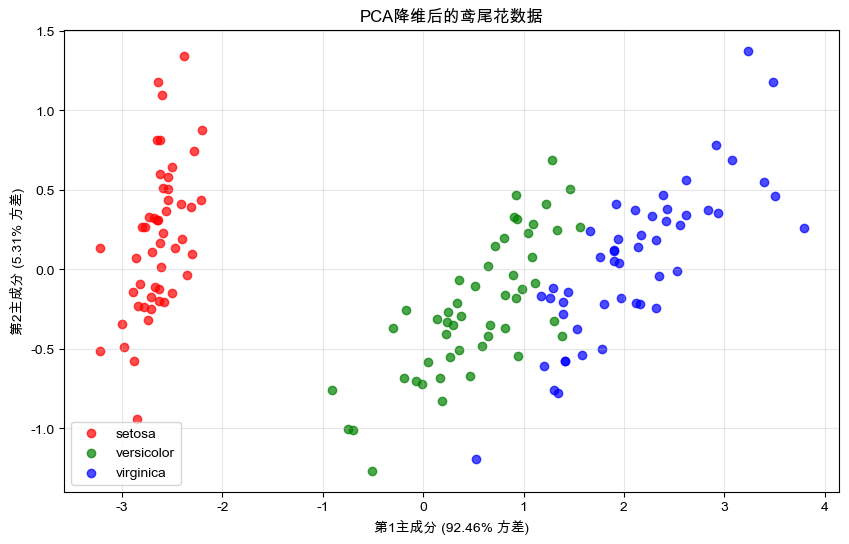

🎯 观察：不同类别的花在主成分空间中有明显的分离！


In [25]:
# 可视化PCA结果
plt.figure(figsize=(10, 6))

colors = ['red', 'green', 'blue']
target_names = iris.target_names

for i, color, target_name in zip(range(3), colors, target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], 
               c=color, label=target_name, alpha=0.7)

# 根据字体支持选择标签

xlabel = f'第1主成分 ({pca.explained_variance_ratio_[0]:.2%} 方差)'
ylabel = f'第2主成分 ({pca.explained_variance_ratio_[1]:.2%} 方差)'
title = 'PCA降维后的鸢尾花数据'
obs_text = "🎯 观察：不同类别的花在主成分空间中有明显的分离！"

plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title(title)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(obs_text)


### 🔍 PCA的数学原理

让我们手动实现PCA的核心步骤，理解其背后的数学原理：

1. **数据中心化**：减去均值
2. **计算协方差矩阵**：衡量特征间的相关性
3. **特征值分解**：找到主要方向
4. **选择主成分**：按重要性排序
5. **数据投影**：变换到新的坐标系


In [26]:
# 手动实现PCA的核心步骤

print("🔍 Manual PCA Implementation:")
print("="*40)

# 1. 数据标准化
X_centered = X - np.mean(X, axis=0)
print("✅ Step 1: Data centering completed")

# 2. 计算协方差矩阵
cov_matrix = np.cov(X_centered.T)
print(f"✅ Step 2: Covariance matrix shape: {cov_matrix.shape}")

# 3. 计算特征值和特征向量
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print("✅ Step 3: Eigenvalue decomposition completed")

# 4. 按特征值大小排序
idx = np.argsort(eigenvalues)[::-1]
eigenvalues_sorted = eigenvalues[idx]
eigenvectors_sorted = eigenvectors[:, idx]
print("✅ Step 4: Sorted by eigenvalues")

print(f"\nEigenvalues (sorted): {eigenvalues_sorted}")
print(f"Variance ratios: {eigenvalues_sorted / np.sum(eigenvalues_sorted)}")


🔍 Manual PCA Implementation:
✅ Step 1: Data centering completed
✅ Step 2: Covariance matrix shape: (4, 4)
✅ Step 3: Eigenvalue decomposition completed
✅ Step 4: Sorted by eigenvalues

Eigenvalues (sorted): [4.22824171 0.24267075 0.0782095  0.02383509]
Variance ratios: [0.92461872 0.05306648 0.01710261 0.00521218]


In [29]:
# 5. 选择前两个主成分进行投影
W = eigenvectors_sorted[:, :2]  # 选择前两个特征向量
X_pca_manual = X_centered @ W
print(X_pca_manual)
print("✅ Step 5: Data projection completed")

print(f"\nManual PCA result shape: {X_pca_manual.shape}")
print(f"Sklearn PCA result shape: {X_pca.shape}")

# 验证结果（可能有符号差异，但绝对值应该相同）
difference = np.min([
    np.max(np.abs(X_pca_manual - X_pca)),
    np.max(np.abs(X_pca_manual + X_pca))  # 考虑符号翻转
])

print(f"Maximum difference with sklearn: {difference:.10f}")
if difference < 1e-10:
    print("✅ Manual implementation matches sklearn PCA!")
else:
    print("⚠️  Small differences due to numerical precision or sign conventions")


[[-2.68412563 -0.31939725]
 [-2.71414169  0.17700123]
 [-2.88899057  0.14494943]
 [-2.74534286  0.31829898]
 [-2.72871654 -0.32675451]
 [-2.28085963 -0.74133045]
 [-2.82053775  0.08946138]
 [-2.62614497 -0.16338496]
 [-2.88638273  0.57831175]
 [-2.6727558   0.11377425]
 [-2.50694709 -0.6450689 ]
 [-2.61275523 -0.01472994]
 [-2.78610927  0.235112  ]
 [-3.22380374  0.51139459]
 [-2.64475039 -1.17876464]
 [-2.38603903 -1.33806233]
 [-2.62352788 -0.81067951]
 [-2.64829671 -0.31184914]
 [-2.19982032 -0.87283904]
 [-2.5879864  -0.51356031]
 [-2.31025622 -0.39134594]
 [-2.54370523 -0.43299606]
 [-3.21593942 -0.13346807]
 [-2.30273318 -0.09870885]
 [-2.35575405  0.03728186]
 [-2.50666891  0.14601688]
 [-2.46882007 -0.13095149]
 [-2.56231991 -0.36771886]
 [-2.63953472 -0.31203998]
 [-2.63198939  0.19696122]
 [-2.58739848  0.20431849]
 [-2.4099325  -0.41092426]
 [-2.64886233 -0.81336382]
 [-2.59873675 -1.09314576]
 [-2.63692688  0.12132235]
 [-2.86624165 -0.06936447]
 [-2.62523805 -0.59937002]
 

## 📝 今日总结

### ✅ 你学到了什么？

1. **特征值和特征向量**：
   - 特征向量是变换后方向不变的向量
   - 特征值是变换的缩放倍数
   - 可以用 `np.linalg.eig()` 计算

2. **主成分分析(PCA)**：
   - 找到数据变化最大的方向
   - 用于降维、可视化、去噪
   - 可以用 `sklearn.decomposition.PCA` 实现

### 🎯 实际应用

- **数据预处理**：降维减少计算量
- **特征工程**：提取主要特征
- **数据可视化**：高维数据可视化

### 🚀 下一步

现在你已经掌握了线性代数的核心概念，可以开始学习：
- 机器学习算法（线性回归、分类）
- 神经网络基础
- 深度学习框架

### 🔧 关于字体设置

如果你在运行过程中遇到中文字体问题，这是正常的。我们的代码会自动：
- 检测系统可用字体
- 优先使用中文字体（如PingFang SC）
- 如果不可用，自动切换到英文标签
- 确保图表正常显示
